In [1]:
import pandas as pd
import numpy as np
import xarray as xr
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
amoc=pd.read_csv('amoc_averaged.txt')
sst_annual = xr.open_dataset('tas_annual_control_redo.nc')

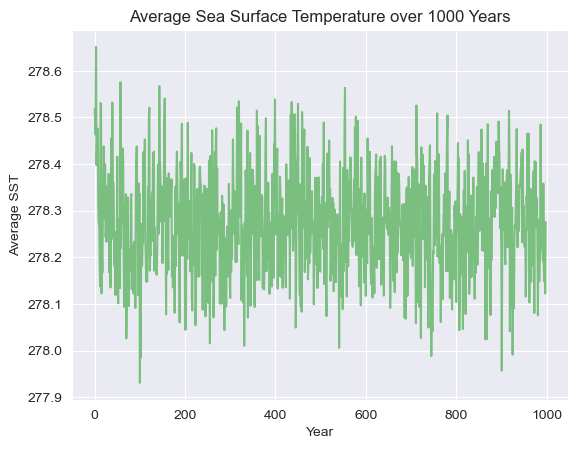

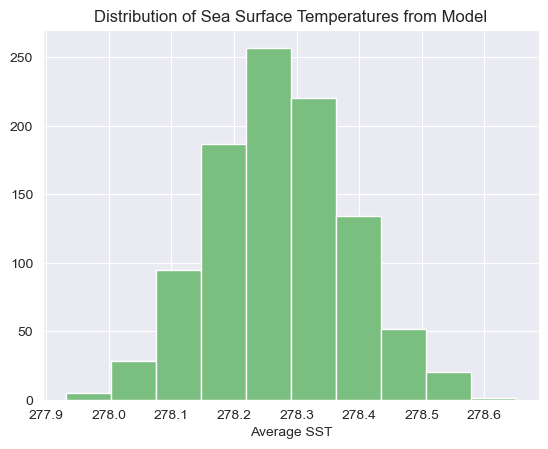

In [41]:
sst = sst_annual.to_dataframe().reset_index()
#global mean
global_mean = sst.groupby('time')['tas'].mean().reset_index()
#change to years instead of time intervals
global_mean['Year'] = list(range(0,999))

plt.figure()
sns.set_style("darkgrid")

sns.lineplot(data=global_mean,x="Year",y="tas")
plt.ylabel("Average SST")
plt.title("Average Sea Surface Temperature over 1000 Years")
global_mean.head()
#plt.show()
plt.savefig("lineplot_sst.png")

plt.figure()
plt.hist(global_mean["tas"])
plt.title("Distribution of Sea Surface Temperatures from Model")
plt.xlabel("Average SST")
#plt.show()
plt.savefig("histplot_sst.png")

In [37]:
amoc['Year'] = list(range(1,1001))

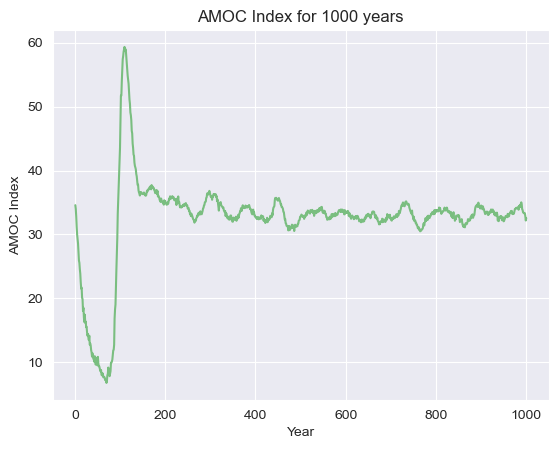

In [38]:
plt.figure()
sns.lineplot(data=amoc,x="Year",y="AMOC Index")
plt.title("AMOC Index for 1000 years")
plt.savefig("simulation_transient.png")

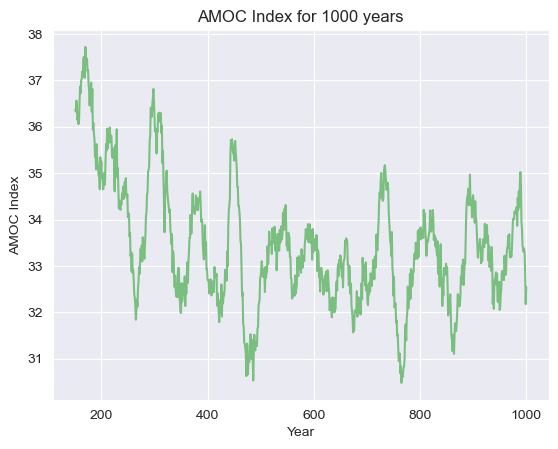

In [39]:
amoc_cut = amoc.loc[amoc["Year"]>150]
plt.figure()
sns.lineplot(data=amoc_cut,x="Year",y="AMOC Index")
plt.title("AMOC Index for 1000 years")
plt.savefig('simulation_notransient.png')

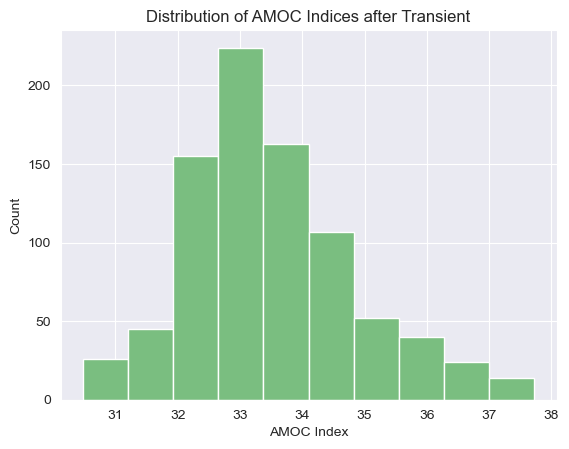

In [40]:
plt.hist(amoc_cut['AMOC Index'])
plt.title("Distribution of AMOC Indices after Transient")
plt.xlabel("AMOC Index")
plt.ylabel("Count")
plt.savefig('PDF_amoc_cut.png')